In [2]:
import torch
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [3]:
import json

with open('data/experiment_embedding_data_tif.json', 'r') as json_file:
    Embedding_dict = json.load(json_file)

with open('data/experiment_embedding_data_tif2.json', 'r') as json_file:
    Embedding_dict2 = json.load(json_file)

with open('data/experiment_embedding_data_tif3.json', 'r') as json_file:
    Embedding_dict3 = json.load(json_file)


In [6]:
# Convert to DataFrame
rows = []
for key, tensor in Embedding_dict.items():
    rows.append([key] + tensor + Embedding_dict2[key] + Embedding_dict3[key])

df = pd.DataFrame(rows, columns=['ID'] + [f'Feature_{i}' for i in range(len(rows[0]) - 1)])
df.index = df.ID
df = df.drop(columns='ID')

In [7]:
pos = df.loc[df.index.str.contains('FCCP')]
neg = df.loc[df.index.str.contains('Vehicle')]
unknown = df.loc[~df.index.isin(["FCCP",'Vehicle'])]
# unknown = df.loc[df.index.isin(["FCCP",'Vehicle','100'])]

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Define the number of nearest points to find
k = 30

# Compute Jaccard distances (note: Jaccard similarity = 1 - Jaccard distance)
similarity = cosine_similarity(pos.values, unknown.values)


# Get the indices of the top k most similar points
top_k_indices = similarity[0].argsort()[-k:][::-1]

nearest_ids = unknown.iloc[top_k_indices].index

In [9]:
nearest_ids[:10]

Index(['98', '86', '101', '100', '111', '89', '102', '104', '76', '120'], dtype='object', name='ID')

# PCA

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [57]:
# Convert to DataFrame
rows = []
for key, tensor in Embedding_dict.items():
    rows.append([key] + tensor + Embedding_dict2[key] + Embedding_dict3[key])

df = pd.DataFrame(rows, columns=['ID'] + [f'Feature_{i}' for i in range(len(rows[0]) - 1)])
df.index = df.ID
df = df.drop(columns='ID')

In [58]:
pca = PCA(n_components=2)
combined_data = df.values  # Combine arrays to apply the same PCA
pca_result = pca.fit_transform(combined_data)

In [59]:
final_result = pd.DataFrame(pca_result,
                            index=df.index
                           )

In [60]:
final_result['label'] = 0
final_result.loc[final_result.index.str.contains('FCCP'),'label'] = 1
final_result.loc[final_result.index.str.contains('Vehicle'),'label'] = 2
final_result.loc[final_result.index.isin(nearest_ids[:10]),'label'] = 3

In [61]:
pos = final_result[final_result['label'] == 1].values
neg = final_result[final_result['label'] == 2].values
select = final_result[final_result['label'] == 3].values
unknown = final_result[final_result['label'] == 0].values

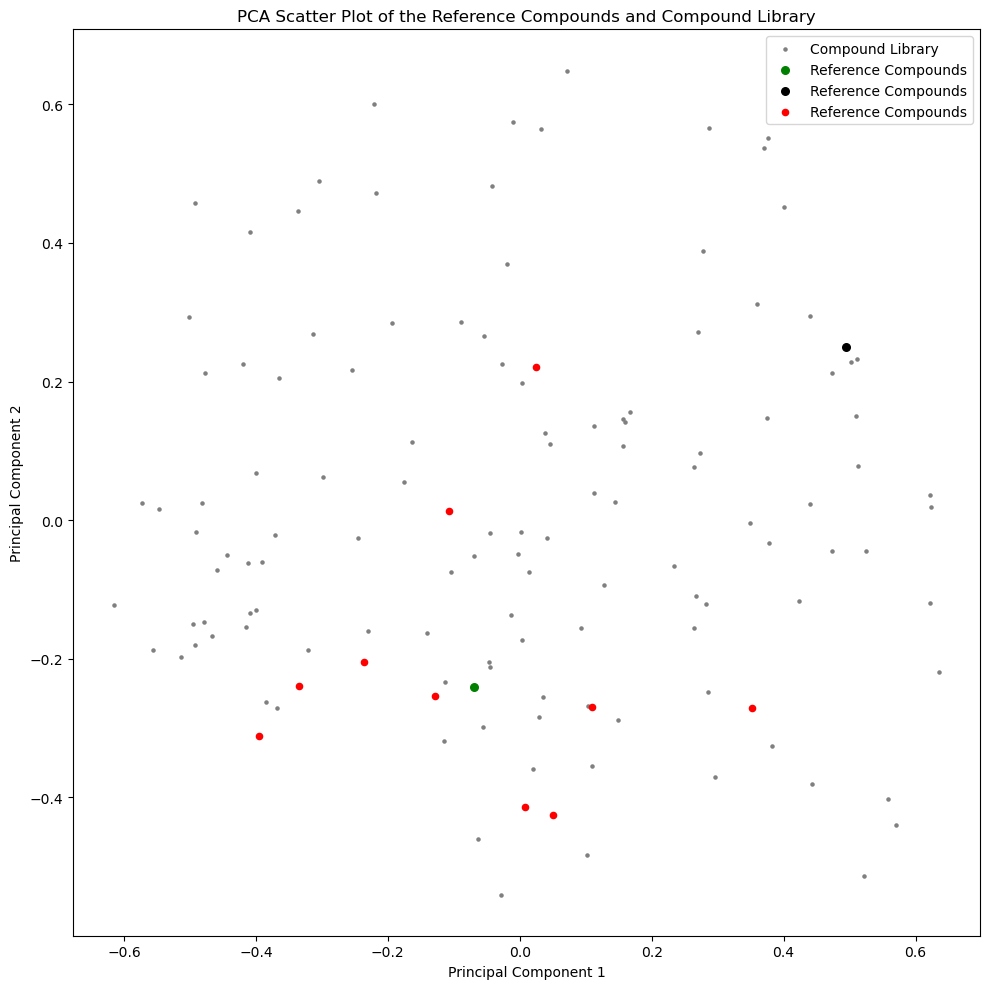

In [64]:
# Plotting the PCA-transformed arrays with different colors
plt.figure(figsize=(10, 10))
plt.scatter(unknown[:, 0], unknown[:, 1], color='gray', alpha=1, s=5, label='Compound Library')
plt.scatter(pos[:, 0], pos[:, 1], color='green', alpha=1, s=30, label='Reference Compounds')
plt.scatter(neg[:, 0], neg[:, 1], color='black', alpha=1, s=30, label='Reference Compounds')
plt.scatter(select[:, 0], select[:, 1], color='red', alpha=1, s=20, label='Reference Compounds')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot of the Reference Compounds and Compound Library')
plt.legend()
plt.tight_layout()
plt.show()